In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MovingAverage():
    
    def __init__(self,N,t):
        
        self.periods = N # N-recent periods
        self.period = t # Period at or after which Level & Forecast is to be estimated
        self.demand_data = ['Dt'] # Demand Data
        self.level = {} # Calculated Level for t & t+1 periods after N-recent periods
        self.forecast = {} # Calculated Forecast for t+1 & t+2 periods
        self.forecast_error = {} # Calculated forecast error
        
    def add_demand_data(self): # Enables the user to insert demand data
        self.demand_data += list(map(float,input().split()))
        
    def perform_analysis(self): # Method for performing analysis
        
        # Assigning variables for defined attributes
        Dt = self.demand_data
        Lt = self.level
        N = self.periods
        Ft = self.forecast
        t = self.period
        Et = self.forecast_error
        
        # L(t)
        Lt['L'+str(t)] = sum(Dt[t:t-N:-1])/N
        
        # F(t+1) = L(t)
        Ft['F'+str(t+1)] = Lt['L'+str(t)]
        
        # Calculating Forecast error
        Et['E'+str(t+1)] = Dt[t+1] - Ft['F'+str(t+1)]
        
        # L(t+1)
        Lt['L'+str(t+1)] = sum(Dt[t+1:t-N+1:-1])/N
        
        # F(t+2) = L(t+1)
        Ft['F'+str(t+2)] = Lt['L'+str(t+1)]
        
        print('Analysis Complete')

--------------------

# Examples

<b>Example - 1</b>
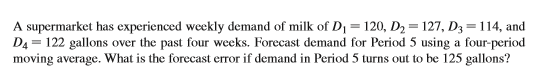

In [3]:
s = MovingAverage(4,4)

In [4]:
s.add_demand_data()

120 127 114 122 125


In [5]:
s.perform_analysis()

Analysis Complete


In [6]:
s.demand_data

['Dt', 120.0, 127.0, 114.0, 122.0, 125.0]

In [7]:
s.level

{'L4': 120.75, 'L5': 122.0}

In [8]:
s.forecast

{'F5': 120.75, 'F6': 122.0}

In [9]:
s.forecast_error

{'E5': 4.25}

--------------------END------------------

# References
1. Supply Chain Management - Strategy, Planning & Operation, Sunil Chopra, Peter Meindl, 6th Edition.